## Tarea 9.10

Gabriel Pichihueche

Ejercicio 4.6.10 del libro de análisis numérico de Burden.

El estudio de la difracción de la luz en una apertura rectangular involucra las integrales de Fresnel

$$
C(t) = \int_0^t dw\,\cos\frac{\pi}{2}w^2\,,\quad S(t) = \int_0^t dw\,\sin\frac{\pi}{2}w^2\,.
$$

Construya una tabla de integrales de Fresnel con una precisión de $10^{-4}$ para los valores $t = 0.1, 0.2, ..., 0.9, 1.0$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Definimos nuestras funciones c(w) y s(w), siendo estas las funciones de coseno y seno que están dentro de las integrales de Fresnel, para luego integrarlas.

In [2]:
def c(w):
    return np.cos((np.pi/2)*w**2)

In [3]:
def s(w):
    return np.sin((np.pi/2)*w**2)

Ahora definimos nuestra función para integración de paso adaptativo, así también podemos dar un nivel de tolerancia y asegurar un error de a lo más 10^-4 como nos pide el ejercicio.

In [4]:
class MaxIterations(Exception):
    pass

def adaptative_step(f, a, b, tol, N=100000):
    # Con func siendo la función a integrar, a y b siendo los límites de integración
    #y tol correspondiendo al valor de tolerancia, N es la cantidad máxima iteraciones.
    
    approx = 0
    i = 0
    toli = [10*tol]
    ai = [a]
    hi = [(b - a)/2]
    fai = [f(a)]
    fbi = [f(b)]
    fci = [f(a + hi[i])]
    S0i = [hi[i]*(fai[i] + 4*fci[i] + fbi[i])/3]
    Li = [1]
    
        
    
    while i >= 0:
        
        fd = f(ai[i] + hi[i]/2)
        fe = f(ai[i] + 3*hi[i]/2)
        S1 = hi[i]*(fai[i] + 4*fd + fci[i])/6
        S2 = hi[i]*(fci[i] + 4*fe + fbi[i])/6
        ai_prec = ai[i]
        hi_prec = hi[i]
        fai_prec = fai[i]
        fbi_prec = fbi[i]
        fci_prec = fci[i]
        toli_prec = toli[i]
        S0i_prec = S0i[i]
        Li_prec = Li[i]
        
        i -= 1
        if abs(S1 + S2 - S0i_prec) < toli_prec:
            approx += S1 + S2
        else:
            if Li_prec >= N:
                raise MaxIterations("Alcanzado máximo número de iteraciones.")
            
            i += 1
            if i >= len(ai):
                ai.append(ai_prec + hi_prec)
                fai.append(fci_prec)
                fci.append(fe)
                fbi.append(fbi_prec)
                hi.append(hi_prec/2)
                toli.append(toli_prec/2)
                S0i.append(S2)
                Li.append(Li_prec + 1)
            else:
                ai[i] = ai_prec + hi_prec
                fai[i] = fci_prec
                fci[i] = fe
                fbi[i] = fbi_prec
                hi[i] = hi_prec/2
                toli[i] = toli_prec/2
                S0i[i] = S2
                Li[i] = Li_prec + 1
                
            i += 1
            if i >= len(ai):
                ai.append(ai_prec)
                fai.append(fai_prec)
                fci.append(fd)
                fbi.append(fci_prec)
                hi.append(hi[i-1])
                toli.append(toli[i-1])
                S0i.append(S1)
                Li.append(Li[i-1])
            else:
                ai[i] = ai_prec
                fai[i] = fai_prec
                fci[i] = fd
                fbi[i] = fci_prec
                hi[i] = hi[i-1]
                toli[i] = toli[i-1]
                S0i[i] = S1
                Li[i] = Li[i-1]
                
    return approx

Aplicamos nuestra función de integración a las funciones c y s para cada límite superior (t) de integración y metemos todos nuestros resultados a un array de dos columnas.

In [5]:
matrix=np.empty([0,2])
for i in np.arange(0,1.1,0.1):
    c_integrada=adaptative_step(c,0,i,0.0001)
    s_integrada=adaptative_step(s,0,i,0.0001)
    resultados=np.array([c_integrada,s_integrada])
    matrix=np.vstack((matrix,resultados))

La matriz resultante tiene los valores de C(t) en la primera columna, y los de S(t) en la segunda.

In [6]:
matrix

array([[0.00000000e+00, 0.00000000e+00],
       [9.99975262e-02, 5.23589387e-04],
       [1.99920853e-01, 4.18758861e-03],
       [2.99399446e-01, 1.41166481e-02],
       [3.97474593e-01, 3.33568374e-02],
       [4.92327199e-01, 6.47203162e-02],
       [5.81060999e-01, 1.10498453e-01],
       [6.59649786e-01, 1.72129265e-01],
       [7.22844230e-01, 2.49325381e-01],
       [7.64971727e-01, 3.39746957e-01],
       [7.79880037e-01, 4.38245260e-01]])

Finalmente graficamos ambas:

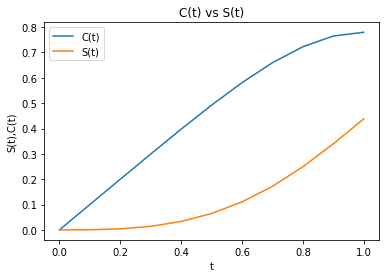

In [7]:
plt.plot(np.arange(0,1.1,0.1), matrix[:,0])
plt.plot(np.arange(0,1.1,0.1), matrix[:,1])
plt.title('C(t) vs S(t)')
plt.legend(('C(t)','S(t)'))
plt.xlabel('t')
plt.ylabel('S(t),C(t)')
plt.show()